In [13]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn 
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras

print(tf.__version__)
print(sys.version_info)
for module in mpl,np,sklearn,tf,keras:
    print(module.__name__,module.__version__)

2.1.0
sys.version_info(major=3, minor=6, micro=9, releaselevel='final', serial=0)
matplotlib 3.2.1
numpy 1.18.2
sklearn 0.22.2.post1
tensorflow 2.1.0
tensorflow_core.keras 2.2.4-tf


In [14]:
layer=tf.keras.layers.Dense(100)
layer=tf.keras.layers.Dense(100,input_shape=(None,5))
layer(tf.zeros([4,5]))

<tf.Tensor: shape=(4, 100), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 

In [15]:
#layer.variables
# x*w+b
layer.trainable_variables

[<tf.Variable 'dense_5/kernel:0' shape=(5, 100) dtype=float32, numpy=
 array([[ 6.87268823e-02,  1.10258609e-02, -1.25569880e-01,
         -9.72458720e-03,  1.00663260e-01,  1.98606148e-01,
         -9.88449752e-02,  2.10160628e-01, -1.41796112e-01,
          9.93589908e-02,  8.18720609e-02,  1.40342966e-01,
          1.76006064e-01, -1.31296873e-01, -3.58177871e-02,
         -1.56302974e-01,  2.70455331e-02,  6.23021871e-02,
         -5.58495522e-05,  2.27380857e-01,  1.42771319e-01,
         -5.95643520e-02,  1.85462788e-01,  1.86793163e-01,
          2.21075907e-01, -2.19942033e-01, -1.36262774e-01,
          6.42888993e-02, -1.87474176e-01, -2.19961926e-01,
          1.55799165e-01,  1.23210415e-01, -5.16342372e-02,
          4.98384982e-02,  1.53157517e-01, -2.10559681e-01,
         -1.68108150e-01,  1.73248067e-01,  1.27658144e-01,
          2.01308534e-01, -8.85976404e-02,  6.54264838e-02,
         -8.97586346e-02, -9.36295390e-02,  3.62076610e-02,
          7.39082247e-02, -1.9

In [16]:
help(layer)

Help on Dense in module tensorflow.python.keras.layers.core object:

class Dense(tensorflow.python.keras.engine.base_layer.Layer)
 |  Just your regular densely-connected NN layer.
 |  
 |  `Dense` implements the operation:
 |  `output = activation(dot(input, kernel) + bias)`
 |  where `activation` is the element-wise activation function
 |  passed as the `activation` argument, `kernel` is a weights matrix
 |  created by the layer, and `bias` is a bias vector created by the layer
 |  (only applicable if `use_bias` is `True`).
 |  
 |  Note: If the input to the layer has a rank greater than 2, then
 |  it is flattened prior to the initial dot product with `kernel`.
 |  
 |  Example:
 |  
 |  ```python
 |  # as first layer in a sequential model:
 |  model = Sequential()
 |  model.add(Dense(32, input_shape=(16,)))
 |  # now the model will take as input arrays of shape (*, 16)
 |  # and output arrays of shape (*, 32)
 |  
 |  # after the first layer, you don't need to specify
 |  # the size

In [17]:
from sklearn.datasets import fetch_california_housing
housing=fetch_california_housing()
print(housing.DESCR)
print(housing.data.shape)
print(housing.target.shape)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [18]:
from sklearn.model_selection import train_test_split
x_train_all,x_test,y_train_all,y_test=train_test_split(housing.data,housing.target,random_state=7)
x_train,x_valid,y_train,y_valid=train_test_split(x_train_all,y_train_all,random_state=11)

print(x_valid.shape,y_valid.shape)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(3870, 8) (3870,)
(11610, 8) (11610,)
(5160, 8) (5160,)


In [19]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
x_train_s=scaler.fit_transform(x_train)
x_valid_s=scaler.fit_transform(x_valid)
x_test_s=scaler.transform(x_test)

In [30]:
# tf.nn.sotfplus: log(1+e^x)  Lambda方法
customized_softplus=keras.layers.Lambda(lambda x :tf.nn.softplus(x))
print(customized_softplus([-10.,-5.,0.,5.,10.]))

tf.Tensor([4.5417706e-05 6.7153489e-03 6.9314718e-01 5.0067153e+00 1.0000046e+01], shape=(5,), dtype=float32)


In [26]:
# customized dense layer.子类方法
class CustomizedDenseLayer(keras.layers.Layer):
    def __init__(self,units,activation = None,**kwargs):
        self.units=units
        self.activation=keras.layers.Activation(activation)
        super(CustomizedDenseLayer,self).__init__(**kwargs)
    def build(self,input_shape):
        """构建所需要的参数"""
        # x*w+b. input_shape:[None,a] w:[a,b] output_shape:[None,b]
        self.kernel=self.add_weight(name='kernel',shape = (input_shape[1],self.units),initializer='uniform',trainable=True)
        self.bias=self.add_weight(name='bias',shape=(self.units,),initializer='zeros',trainable=True)
        super(CustomizedDenseLayer,self).build(input_shape)
    def call(self,x):
        """完整正向计算"""
        return self.activation(x@self.kernel+self.bias)
        
model=keras.models.Sequential([
    CustomizedDenseLayer(30,activation='relu',input_shape=x_train.shape[1:]),
    CustomizedDenseLayer(1),
    customized_softplus,
    #keras.layers.Dense(1,activation='softplus')
    #keras.layers.Dense(1),keras.layers.Activation('softplus'),
])

model.summary()
model.compile(loss='mean_squared_error',optimizer="sgd")

callbacks=[keras.callbacks.EarlyStopping(patience=5,min_delta=1e-2)]

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
customized_dense_layer (Cust (None, 30)                270       
_________________________________________________________________
customized_dense_layer_1 (Cu (None, 1)                 31        
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [27]:
history=model.fit(x_train_s,y_train,validation_data=(x_valid_s,y_valid),epochs=100,callbacks=callbacks)

Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================] - 1s 65us/sample - loss: 1.0912 - val_loss: 0.6386
Epoch 2/100
11610/11610 [==============================] - 0s 42us/sample - loss: 0.5525 - val_loss: 0.5309
Epoch 3/100
11610/11610 [==============================] - 0s 42us/sample - loss: 0.4864 - val_loss: 0.4740
Epoch 4/100
11610/11610 [==============================] - 0s 42us/sample - loss: 0.4585 - val_loss: 0.4533
Epoch 5/100
11610/11610 [==============================] - 0s 42us/sample - loss: 0.4440 - val_loss: 0.4374
Epoch 6/100
11610/11610 [==============================] - 1s 45us/sample - loss: 0.4325 - val_loss: 0.4225
Epoch 7/100
11610/11610 [==============================] - 1s 45us/sample - loss: 0.4211 - val_loss: 0.4178
Epoch 8/100
11610/11610 [==============================] - 0s 42us/sample - loss: 0.4184 - val_loss: 0.4125
Epoch 9/100
11610/11610 [==============================] - 0s 42us/sample - loss: 0.408

In [ ]:
history.history

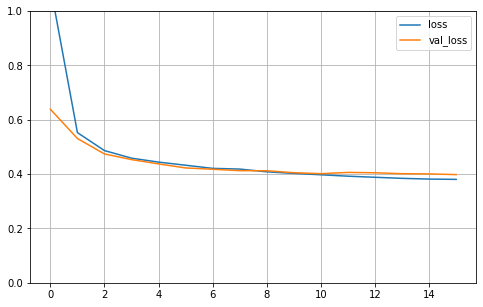

In [28]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8,5))
    plt.grid(True)
    plt.gca().set_ylim(0,1)
    plt.show()
    
plot_learning_curves(history)

In [29]:
model.evaluate(x_test_s,y_test)

5160/5160 [==============================] - 0s 21us/sample - loss: 0.4048


0.40481838089551114